In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [233]:
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [235]:
dataset = pd.read_csv('Housing.csv')

In [237]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [239]:
dataset.shape

(545, 13)

In [245]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [249]:
X = dataset.drop('price', axis=1)
y = dataset['price']

In [251]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  6


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [253]:
# Let us work on Numeric Columns only therefore creating a Seperate DataFrame to work easily
df_numeric = dataset.select_dtypes(include='number')
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [257]:
df_numeric.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [259]:
df_mean=df_numeric.mean()
df_mode=df_numeric.mode()
df_median=df_numeric.median()

In [261]:
df_mean,df_mode,df_median

(price        4.766729e+06
 area         5.150541e+03
 bedrooms     2.965138e+00
 bathrooms    1.286239e+00
 stories      1.805505e+00
 parking      6.935780e-01
 dtype: float64,
      price    area  bedrooms  bathrooms  stories  parking
 0  3500000  6000.0       3.0        1.0      2.0      0.0
 1  4200000     NaN       NaN        NaN      NaN      NaN,
 price        4340000.0
 area            4600.0
 bedrooms           3.0
 bathrooms          1.0
 stories            2.0
 parking            0.0
 dtype: float64)

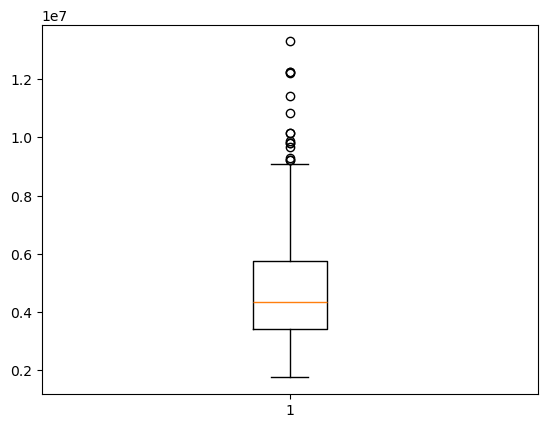

In [263]:
plt.boxplot(dataset['price'])
plt.show()

In [271]:
# Select only numeric columns for IQR calculation
numeric_cols = dataset.select_dtypes(include=['number']).columns

Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Apply IQR rule only on numeric columns
mask = ~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
dataset = dataset[mask]

In [273]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished


In [275]:
dataset.shape

(463, 13)

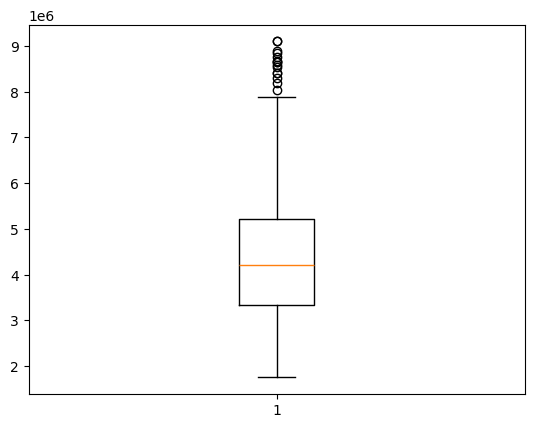

In [277]:
plt.boxplot(dataset['price'])
plt.show()

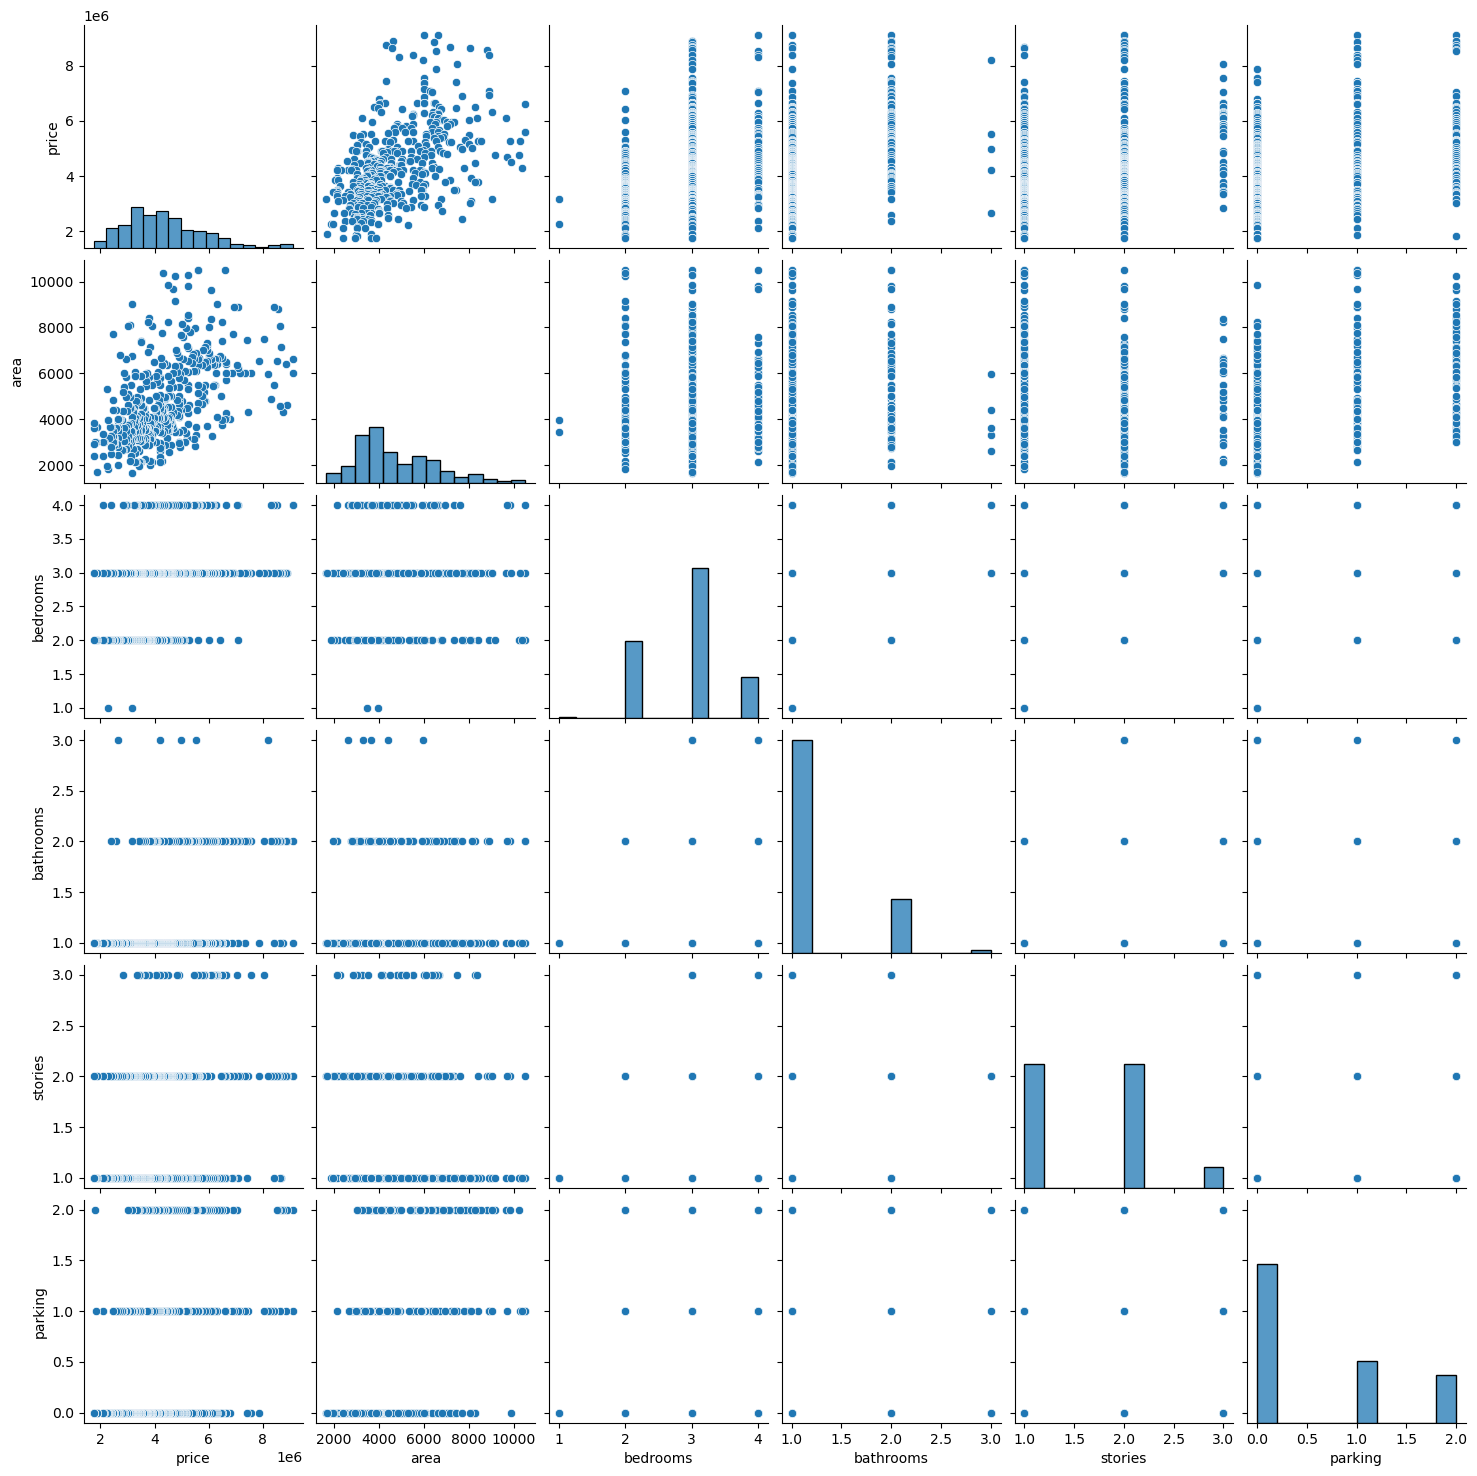

In [279]:
sns.pairplot(dataset[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

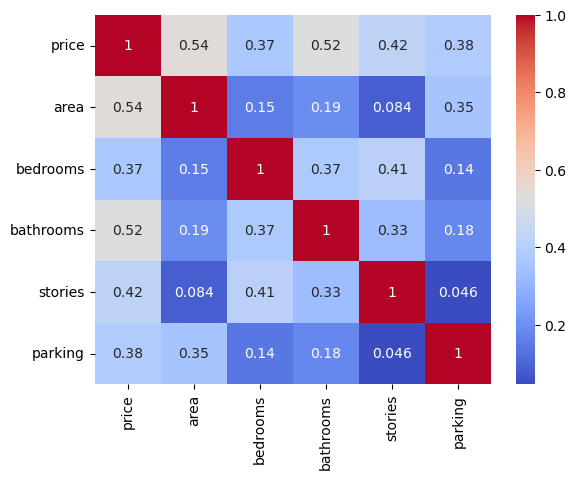

In [280]:
# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [281]:
# Convert categorical to numeric using get_dummies (One-Hot Encoding)
dataset = pd.get_dummies(dataset, drop_first=True)

# Check new columns after encoding
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,True,False,True,False,False,False,True,False
16,9100000,6600,4,2,2,1,True,True,True,False,True,True,False,True
18,8890000,4600,3,2,2,2,True,True,False,False,True,False,False,False
19,8855000,6420,3,2,2,1,True,False,False,False,True,True,True,False
20,8750000,4320,3,1,2,2,True,False,True,True,False,False,True,False


In [282]:
from sklearn.model_selection import train_test_split

X = dataset.drop('price', axis=1)  # Features
y = dataset['price']  

In [287]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,6000,4,1,2,2,True,False,True,False,False,False,True,False
16,6600,4,2,2,1,True,True,True,False,True,True,False,True
18,4600,3,2,2,2,True,True,False,False,True,False,False,False
19,6420,3,2,2,1,True,False,False,False,True,True,True,False
20,4320,3,1,2,2,True,False,True,True,False,False,True,False


In [289]:
from sklearn.model_selection import train_test_split

In [291]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [293]:
from sklearn.linear_model import LinearRegression

In [295]:
linreg=LinearRegression()

In [297]:
linreg.fit(X_train,y_train)

LinearRegression()

In [299]:
y_pred=linreg.predict(X_test)

In [301]:
from sklearn.metrics import accuracy_score

In [303]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", round(r2, 4))
print("MAE:", round(mae, 4))
print("MSE:", round(mse, 4))
print("RMSE:", round(rmse, 4))

R² Score: 0.6191
MAE: 720466.2472
MSE: 952423844871.423
RMSE: 975922.0486


In [305]:
print(X_train.shape)
print(y_train.shape)

(347, 13)
(347,)


In [307]:
len(X_train), len(y_train)

(347, 347)

In [309]:
X_train.shape , y_train.shape

((347, 13), (347,))

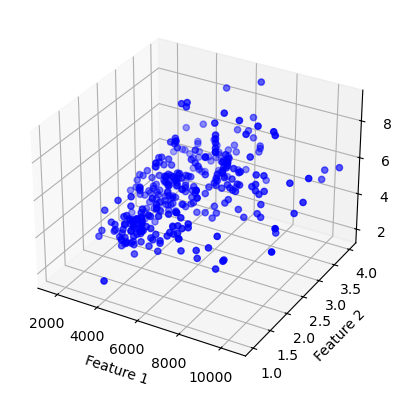

In [311]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, color='blue')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

In [313]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


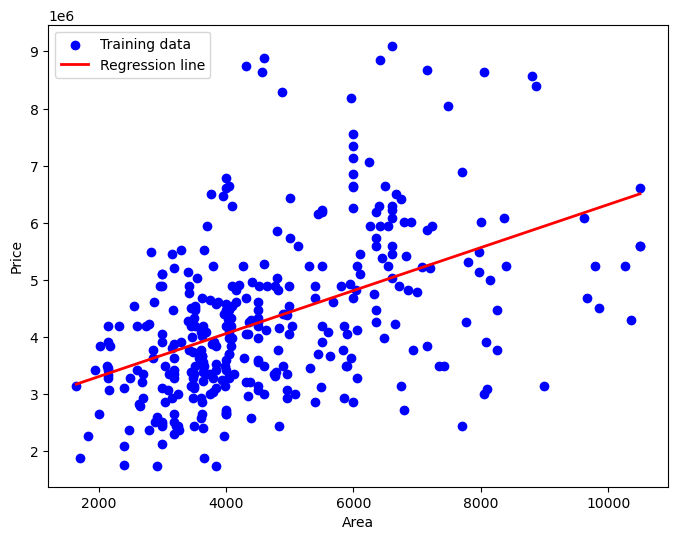

In [317]:
# Single feature (area)
X_area = X_train[['area']]
y_area = y_train

# Train regression model using only 'area'
reg_area = LinearRegression()
reg_area.fit(X_area, y_area)

# Sort values for smooth line
X_sorted = np.sort(X_area.values, axis=0)
y_pred_sorted = reg_area.predict(X_sorted)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_area, y_area, color='blue', label='Training data')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()